<a href="https://colab.research.google.com/github/Kamaukaguru/Phase2-project-Grp6/blob/data-analysis/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KINGS COUNTY HOUSE SALES ANALYSIS.

Please fill out:
* Student names:
1. Benson Kamau
2. Kevin Muchori
3. Nancy Chelangat
4. Breden Mugambi
5. Sally Kinyanjui

* Student pace: Full time

* Scheduled project review date/time: N/A

* Instructor name: Nikita Njoroge


BUSINESS UNDERSTANDING

This study aims to explore the relationship between key factors such as renovations, bedrooms, and other property attributes with housing prices in King County. By leveraging on the dataset available, we seek to uncover the specific impact of renovations on property valuations, considering variables such as the extent of renovations.

Additionally, we aim to investigate how the number of bedrooms, bathrooms, along with other structural features like square footage and lot size, view  influences housing prices.
This can help homeowners to add functionality and beauty to their property while simultaneously boosting its resale value.

Main Objective

To build and evaluate models using various combinations of the available features in the King County.


Specific Objectives

1. To evaluate how the number of floors impacts the price of a house in King County.
2. To determine how the number of bedrooms impacts the price of a house in King County.
3. To examine the impact the number of bathrooms has on the price of a house in King County.
4. To assess the impact of renovations on the price of a house in King County.
5. To evaluate which combinations of the available features in the dataset are the most impactful features for predicting sale price.


DATA UNDERSTANDING

This project analyzes data about homes sold in King County, Washington between May 2014 and May 2015 in order to make recommendations to relevant stakeholders.

This dataset is housed in the kc_house_data.csv file within the project's data folder and the columns outlined in the accompanying column_names.md file.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import the relevant library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

# Define the DataFrame in the global scope
df = pd.DataFrame()

#create a function that loads data and gets the info about the data.
def load_and_get_info(file_path):
    """
    Load data from a CSV file and get information about the DataFrame.

    Parameters:
    - file_path (str): Path to the CSV file.

    Returns:
    - df_info (str): Information about the DataFrame.
    """
    # Load data
    global df
    df = pd.read_csv(file_path)

    # Display the first few rows of the DataFrame
    df_head = df.head()

    # Get information about the DataFrame
    df_info = df.info()

    return df_info, df_head

#file_path = 'data/kc_house_data.csv'
file_path = '/content/drive/MyDrive/data/kc_house_data.csv'
data_info, data_head = load_and_get_info(file_path)
print(data_info)
print("\nFirst few rows of the DataFrame:")
data_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


This dataset contains records of 21,597 home sales. It includes:

How much the house sold for

Square footage of the house's living space

Square footage of the lot

Number of floors, bedrooms, and bathrooms

The quality of the view from the house

Whether the house is on a waterfront

The house's grade (relates to construction materials and quality)

The house's condition (relates to age and maintenance)

The year the house was built

The year the house was renovated

The location of the house

The following columns have missing values:
1. waterfront
2. yr_renovated

In [3]:
def check_dtypes(df):
    """
    Check data types and identify the kind of variable for each column in the DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame.

    Returns:
    - dtypes_info (DataFrame): DataFrame containing information about data types and variable types.
    """
    # Get data types of each column
    dtypes = df.dtypes

    # Identify variable types (numeric or categorical) for each column
    variable_types = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            variable_types.append('Numeric')
        else:
            variable_types.append('Categorical')

    # Create DataFrame to store information
    dtypes_info = pd.DataFrame({'Column': dtypes.index, 'Data Type': dtypes.values, 'Variable Type': variable_types})

    return dtypes_info

data_types_info = check_dtypes(df)
print(data_types_info)

           Column Data Type Variable Type
0              id     int64       Numeric
1            date    object   Categorical
2           price   float64       Numeric
3        bedrooms     int64       Numeric
4       bathrooms   float64       Numeric
5     sqft_living     int64       Numeric
6        sqft_lot     int64       Numeric
7          floors   float64       Numeric
8      waterfront    object   Categorical
9            view    object   Categorical
10      condition    object   Categorical
11          grade    object   Categorical
12     sqft_above     int64       Numeric
13  sqft_basement    object   Categorical
14       yr_built     int64       Numeric
15   yr_renovated   float64       Numeric
16        zipcode     int64       Numeric
17            lat   float64       Numeric
18           long   float64       Numeric
19  sqft_living15     int64       Numeric
20     sqft_lot15     int64       Numeric


## Data Preparation.

In [4]:
# Define a custom function to transform the yr_renovated column and drop the column after transformation
def transform_and_drop_yr_renovated(df):
    """
    Transform yr_renovated column to read 'Yes' if there is a year recorded,
    and 'No' if there is no year in the record. Then drop the original
    yr_renovated column.

    Parameters:
    - df (DataFrame): Input DataFrame.

    Returns:
    - df_transformed (DataFrame): Transformed DataFrame with dropped column.
    """
    # Define a custom function to transform the yr_renovated column
    def transform_yr_renovated(value):
        if pd.notnull(value) and value != 0:  # Check if value is not NaN and not equal to 0
            return 'Yes'
        else:
            return 'No'

    # Apply the custom function to transform the yr_renovated column
    df['house_renovation'] = df['yr_renovated'].apply(transform_yr_renovated)

    # Drop the original yr_renovated column
    df = df.drop(columns=['yr_renovated'])

    return df

# Apply the custom function to transform and drop yr_renovated column
df = transform_and_drop_yr_renovated(df)

# Print the transformed DataFrame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,No


Each row represents information about a specific house, and each column provides different characteristics of the houses for example the house with id 7129300520 goes for the price of 221900,has three bedrooms,one bathroom,a squarefeet of 1180,a squarefeet lot of 5650.
This is the same criteria we use in for the other houses.


This function transform_and_drop_yr_renovated(df)  transforms the 'yr_renovated' column in a DataFrame and then drops the original column we now have a column stating whether the house renovation took place or not replacing the column there which was showing what year the renovation took place.

This transformation allows you to categorize whether each house has been renovated ('Yes') or not ('No'), based on the presence or absence of a renovation year in the original 'yr_renovated' column.

The df.head() statement prints the first few rows of the transformed DataFrame to check the result.

checking for null and duplicate values function.

In [5]:
def check_null_and_duplicates(df):
    """
    Check for both null values and duplicated rows in a DataFrame.

    Parameters:
    - df: DataFrame
        The DataFrame to check.

    Returns:
    - info_df: DataFrame
        DataFrame containing information about null values and duplicated rows.
    """
    # Check for null values
    null_values = df.isnull().sum()
    if null_values.sum() > 0:
        print("Null Values:")
        print(null_values)
    else:
        print("No Null Values Found.")

    # Check for duplicated rows
    duplicated_rows = df.duplicated().sum()
    if duplicated_rows > 0:
        print("\nDuplicated Rows Found:", duplicated_rows)
        duplicated_df = df[df.duplicated()]
        print(duplicated_df)
    else:
        print("\nNo Duplicated Rows Found.")
        duplicated_df = pd.DataFrame()  # Empty DataFrame if no duplicates

    # Create a DataFrame to store information
    info_df = pd.DataFrame({
        'Column': null_values.index,
        'Null Count': null_values.values,
        'Duplicated Rows': duplicated_rows
    })
    return info_df
info_df= check_null_and_duplicates(df)
print (info_df)

Null Values:
id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront          2376
view                  63
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
house_renovation       0
dtype: int64

No Duplicated Rows Found.
              Column  Null Count  Duplicated Rows
0                 id           0                0
1               date           0                0
2              price           0                0
3           bedrooms           0                0
4          bathrooms           0                0
5        sqft_living           0                0
6           sqft_lot           0                0
7             floors  

'waterfront' column has 2376 null values.

'view' column has 63 null values.

All other columns have zero null values.

No Duplicated Rows Found: This line indicates that there are no duplicated rows in DataFrame.

## Function for dropping duplicates,nulls and column names and replacing values.
So we will use the Python function 'dropper'. This function is used for cleaning a dataframe by dropping duplicates,null values and separated columns.In the function below we also include replacing the NaN values in our waterfront column with None.

In [6]:
def dropper(df, one=None, two=None, three=None):
    '''
    Input: DataFrame, request 1,request 2, request 3
    requests:
    'duplicates' to drop duplicates
    'nulls' to drop null values
    list containing df column names l = ['','','']
    '''
    request = [one,two,three]
    if 'duplicates' in request:
        df = df.drop_duplicates()
    if 'nulls' in request:
        df = df.dropna()
    for req in request:
        if isinstance(req, list):
            df = df.drop(columns=req, axis=1).reset_index(drop=True)
    return(df)
data_info = check_dtypes(df)
print(df)

#Changing values for our column waterfront
# Assuming your DataFrame is named df
df['waterfront'] = df['waterfront'].fillna('NONE')
print(df['waterfront'].value_counts())

               id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \


After finding the number of null values in the previous function, we have now dropped our null values using df =df.dropna()

In this dataframe, we have changed the output of waterfront column from NaN to None using the fill.na().
the column waterfront has the data type interger.

'NO': There are 19075 occurrences of 'NO' in the 'waterfront' column. This indicates that these properties do not have a waterfront view.

'NONE': There are 2376 occurrences of 'NONE' in the 'waterfront' column. This likely indicates that these records originally had missing values (NaN) for the waterfront attribute, and they have been replaced with the string 'NONE'.

'YES': There are 146 occurrences of 'YES' in the 'waterfront' column. This indicates that these properties have a waterfront view.

DATA ANALYSIS

To evaluate how the number of floors impacts the price of a house in King County.  
To determine how the number of bedrooms impacts the price of a house in King County.  
To examine the impact the number of bathrooms has on the price of a house in King County.  
To assess the impact of renovations on the price of a house in King County.  
To evaluate which combinations of the available features in the dataset are the most impactful features for predicting sale price.  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21597 non-null  int64  
 1   date              21597 non-null  object 
 2   price             21597 non-null  float64
 3   bedrooms          21597 non-null  int64  
 4   bathrooms         21597 non-null  float64
 5   sqft_living       21597 non-null  int64  
 6   sqft_lot          21597 non-null  int64  
 7   floors            21597 non-null  float64
 8   waterfront        21597 non-null  object 
 9   view              21534 non-null  object 
 10  condition         21597 non-null  object 
 11  grade             21597 non-null  object 
 12  sqft_above        21597 non-null  int64  
 13  sqft_basement     21597 non-null  object 
 14  yr_built          21597 non-null  int64  
 15  zipcode           21597 non-null  int64  
 16  lat               21597 non-null  float6

In [8]:
df['floors'].sample(50)

1349     1.0
17168    1.0
2054     1.0
3655     2.0
4120     2.0
9836     3.0
5450     1.5
8128     1.0
4869     1.0
15488    2.0
3362     2.0
13226    1.0
20947    2.0
10699    1.0
2162     1.0
9133     1.5
4783     2.0
10301    1.5
11445    1.0
19577    1.0
1124     1.0
8739     1.0
17887    1.0
19188    1.5
20213    2.0
8260     1.0
3771     2.0
13801    1.0
8390     1.0
14946    2.0
66       2.0
7886     1.0
13800    1.0
11206    2.0
17475    1.0
9308     1.0
1272     1.0
1812     1.0
17522    1.0
8083     2.0
5767     1.0
13334    2.0
9235     1.0
4459     2.0
3333     1.5
10463    2.0
15797    1.5
17260    1.0
13657    1.0
13930    1.0
Name: floors, dtype: float64

In [9]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [10]:
sorted_df_floors = df.sort_values(by=['floors'])
sorted_df_price = df.sort_values(by=['price'])
sorted_df_floors['floors']


0        1.0
11155    1.0
11157    1.0
11158    1.0
11162    1.0
        ... 
15410    3.5
14871    3.5
20756    3.5
18462    3.5
20292    3.5
Name: floors, Length: 21597, dtype: float64

<ipython-input-11-6e73028704c1>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cividis')  # Or any other colormap you prefer


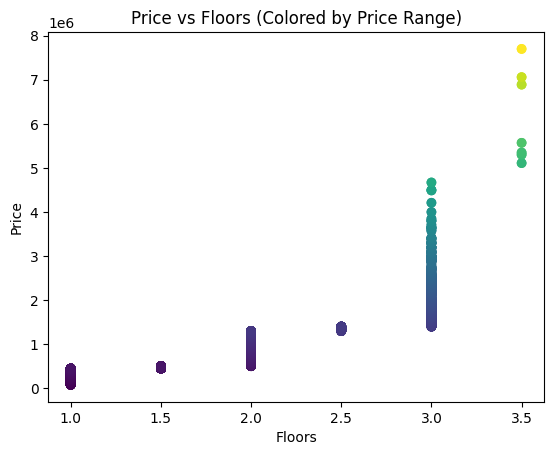

In [11]:
plt.scatter(sorted_df_floors['floors'], sorted_df_price['price'], c=sorted_df_price['price'])

color_ranges = [0, 1, 2, 3, 4]  # Define price ranges for coloring
colors = ['red', 'yellow','orange', 'green']  # Define colors for each range

# Create a colormap based on price ranges and colors
cmap = plt.cm.get_cmap('cividis')  # Or any other colormap you prefer
norm = plt.Normalize(vmin=min(color_ranges), vmax=max(color_ranges))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Color points based on price ranges
plt.scatter(sorted_df_floors['floors'], sorted_df_price['price'], c=norm(sorted_df_price['price']))
#plt.colorbar(sm, label='Floor Range')  # Add a colorbar legend

plt.xlabel('Floors')
plt.ylabel('Price')
plt.title('Price vs Floors (Colored by Price Range)')
plt.show()


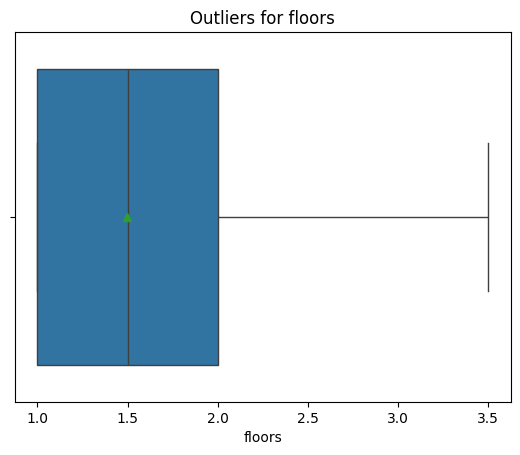

In [28]:
#Box plot used to show the outliers in the number of bathrooms available in houses in King County
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x = df["floors"],
    showmeans=True,
    showfliers=True,  # Ensure outliers are plotted
    flierprops=dict(markerfacecolor="red"),
    data=df
)

plt.xticks(rotation=0)
plt.title("Outliers for floors")
plt.show()

In the code above, we have tackled our first question: does flooe size affect pricing?  
we have also seen that there are no outliers present in the data as the floors go to a maximum of 3.5 floors

Question 2

In [12]:
df['bedrooms']

0        3
1        3
2        2
3        4
4        3
        ..
21592    3
21593    4
21594    2
21595    3
21596    2
Name: bedrooms, Length: 21597, dtype: int64

In [13]:
sorted_df_bedrooms = df.sort_values(by=['bedrooms'])
sorted_df_bedrooms['bedrooms']

9877      1
9536      1
14332     1
14340     1
12823     1
         ..
15147    10
13301    10
19239    10
8748     11
15856    33
Name: bedrooms, Length: 21597, dtype: int64

<ipython-input-14-2919b537aaef>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer


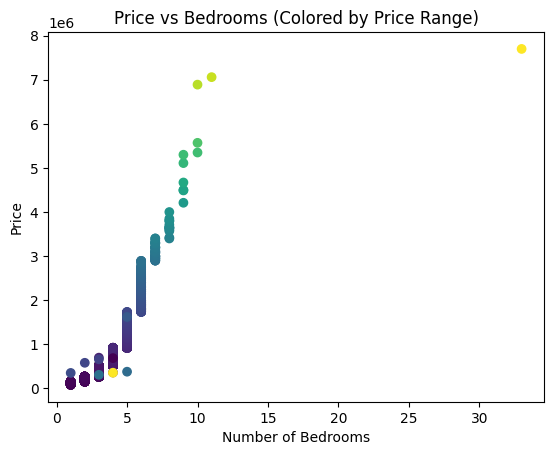

In [14]:
plt.scatter(sorted_df_bedrooms['bedrooms'], sorted_df_price['price'], c=sorted_df_price['price'])

color_ranges = [0, 1, 2, 3, 4]  # Define price ranges for coloring
colors = ['red', 'yellow','orange', 'green']  # Define colors for each range

# Create a colormap based on price ranges and colors
cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer
norm = plt.Normalize(vmin=min(color_ranges), vmax=max(color_ranges))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Color points based on price ranges
plt.scatter(sorted_df_bedrooms['bedrooms'].sample(10), sorted_df_price['price'].sample(10), c=norm(sorted_df_price['price'].sample(10)))
#plt.colorbar(sm, label='Floor Range')  # Add a colorbar legend

plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms (Colored by Price Range)')
plt.show()

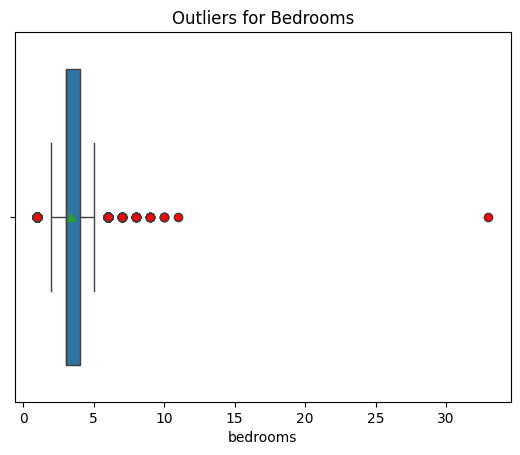

In [27]:
#Box plot used to show the outliers in the number of bathrooms available in houses in King County
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x = df["bedrooms"],
    showmeans=True,
    showfliers=True,  # Ensure outliers are plotted
    flierprops=dict(markerfacecolor="red"),
    data=df
)

plt.xticks(rotation=0)
plt.title("Outliers for Bedrooms")
plt.show()

Objective 3  
To examine the impact the number of bathrooms has on the price of a house in King County

In [15]:
df['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21592    2.50
21593    2.50
21594    0.75
21595    2.50
21596    0.75
Name: bathrooms, Length: 21597, dtype: float64

In [16]:
sorted_df_bathrooms = df.sort_values(by=['bathrooms'])
sorted_df_bathrooms['bathrooms']

2259     0.50
12029    0.50
11662    0.50
10413    0.50
21596    0.75
         ... 
4020     6.75
8537     7.50
9245     7.75
7245     8.00
12764    8.00
Name: bathrooms, Length: 21597, dtype: float64

<ipython-input-17-440ca6db874a>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer


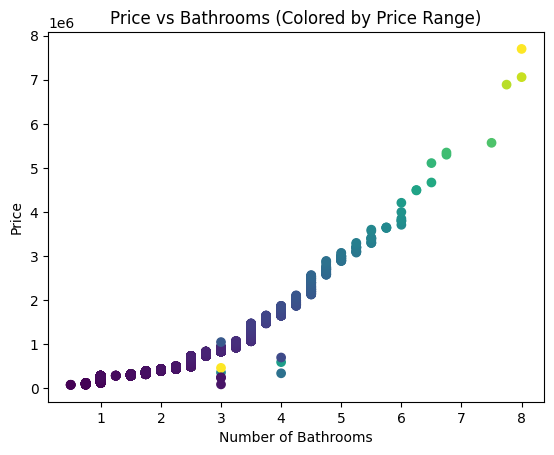

In [17]:
plt.scatter(sorted_df_bathrooms['bathrooms'], sorted_df_price['price'], c=sorted_df_price['price'])

color_ranges = [0, 1, 2, 3, 4]  # Define price ranges for coloring
colors = ['red', 'yellow','orange', 'green']  # Define colors for each range

# Create a colormap based on price ranges and colors
cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer
norm = plt.Normalize(vmin=min(color_ranges), vmax=max(color_ranges))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Color points based on price ranges
plt.scatter(sorted_df_bedrooms['bedrooms'].sample(10), sorted_df_price['price'].sample(10), c=norm(sorted_df_price['price'].sample(10)))
#plt.colorbar(sm, label='Floor Range')  # Add a colorbar legend

plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Price vs Bathrooms (Colored by Price Range)')
plt.show()

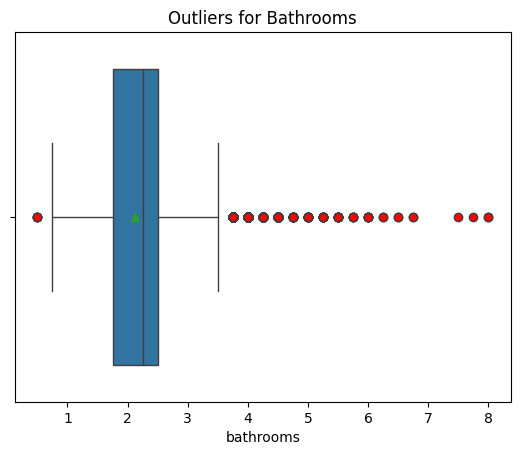

In [26]:
#Box plot used to show the outliers in the number of bathrooms available in houses in King County
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x = df["bathrooms"],
    showmeans=True,
    showfliers=True,  # Ensure outliers are plotted
    flierprops=dict(markerfacecolor="red"),
    data=df
)

plt.xticks(rotation=0)
plt.title("Outliers for Bathrooms")
plt.show()

objective 4  
To assess the impact of renovations on the price of a house in King County.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21597 non-null  int64  
 1   date              21597 non-null  object 
 2   price             21597 non-null  float64
 3   bedrooms          21597 non-null  int64  
 4   bathrooms         21597 non-null  float64
 5   sqft_living       21597 non-null  int64  
 6   sqft_lot          21597 non-null  int64  
 7   floors            21597 non-null  float64
 8   waterfront        21597 non-null  object 
 9   view              21534 non-null  object 
 10  condition         21597 non-null  object 
 11  grade             21597 non-null  object 
 12  sqft_above        21597 non-null  int64  
 13  sqft_basement     21597 non-null  object 
 14  yr_built          21597 non-null  int64  
 15  zipcode           21597 non-null  int64  
 16  lat               21597 non-null  float6

In [20]:
df['house_renovation']

0         No
1        Yes
2         No
3         No
4         No
        ... 
21592     No
21593     No
21594     No
21595     No
21596     No
Name: house_renovation, Length: 21597, dtype: object

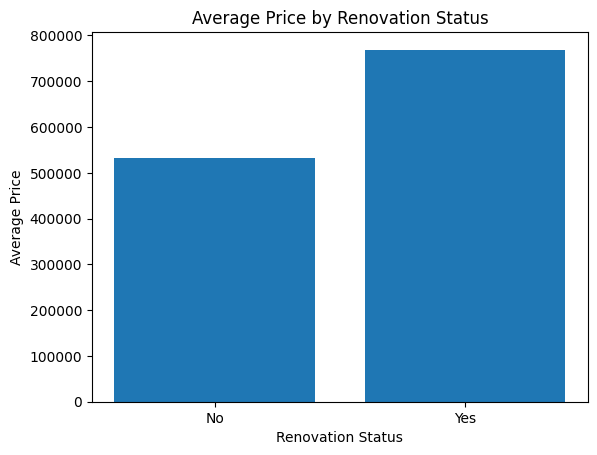

In [21]:

# Calculate average price for each renovation status
price_by_renovation = df.groupby('house_renovation')['price'].mean()

# Extract data for the plot
renovation_groups = price_by_renovation.index.tolist()
average_prices = price_by_renovation.tolist()

# Bar plot
plt.bar(renovation_groups, average_prices)

# Add labels and title
plt.xlabel("Renovation Status")
plt.ylabel("Average Price")
plt.title("Average Price by Renovation Status")

# Show the plot
plt.show()

OBJECTIVE 5:  
Variables used to determine pricing

In [33]:
type(df['yr_built'])

pandas.core.series.Series

In [31]:
sorted_df_yr_built = df.sort_values(by=['yr_built'])
sorted_df_yr_built

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_renovation
14069,3521059042,7/28/2014,255500.0,4,1.00,1370,41194,1.5,NO,AVERAGE,...,5 Fair,1370,0.0,1900,98092,47.2716,-122.144,1590,84070,No
14783,4226900211,10/23/2014,560000.0,4,1.00,1360,5814,1.5,NO,NONE,...,6 Low Average,1360,0.0,1900,98122,47.6038,-122.314,1010,5814,No
10973,452001890,4/15/2015,730000.0,3,1.75,1650,5000,1.5,NO,NONE,...,8 Good,1650,0.0,1900,98107,47.6743,-122.371,1630,5000,No
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,NO,NONE,...,8 Good,2780,?,1900,98117,47.6981,-122.368,1830,6350,No
4693,9126101645,6/10/2014,558000.0,4,2.00,2180,3870,1.0,NO,NONE,...,7 Average,1020,1160.0,1900,98122,47.6089,-122.303,1520,2580,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20235,7853440050,5/5/2015,771005.0,5,4.50,4000,6713,2.0,NO,NONE,...,9 Better,4000,0.0,2015,98024,47.5254,-121.886,3690,6600,No
7519,9520900210,12/31/2014,614285.0,5,2.75,2730,6401,2.0,NO,NONE,...,8 Good,2730,0.0,2015,98072,47.7685,-122.160,2520,6126,No
14911,2770602360,4/21/2015,671000.0,4,2.75,1890,1475,2.0,NO,NONE,...,9 Better,1200,690.0,2015,98199,47.6472,-122.383,1650,1682,No
4150,8077100031,4/22/2015,631000.0,3,2.25,1670,1396,2.0,NO,NONE,...,9 Better,1250,420.0,2015,98115,47.6814,-122.288,1610,5191,No


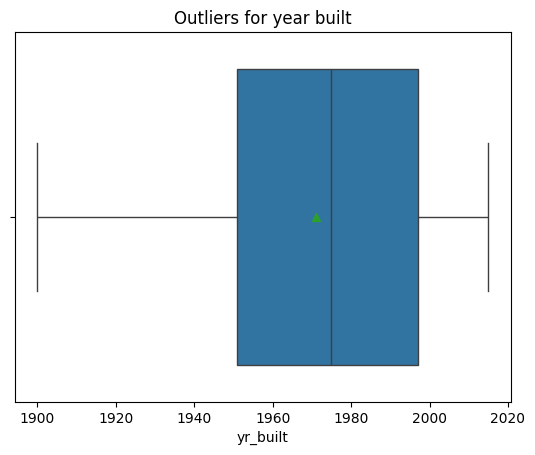

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x = df["yr_built"],
    showmeans=True,
    showfliers=True,  # Ensure outliers are plotted
    flierprops=dict(markerfacecolor="red"),
    data=df
)

plt.xticks(rotation=0)
plt.title("Outliers for year built")
plt.show()